In [1]:
# OpenCV, numpy, matplotlib etc. 
import torch
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.animation
import os, sys

# Local files
sys.path.insert(0,'../')
import pyClient
from pyClient import Environment
import utils

### Environment

Connect to the unity hallway environment.

#### Attention: Start Unity server first!

In [2]:
# Unity environment
ip         = "127.0.0.1" # Ip address that the TCP/IP interface listens to
port       = 13000       # Port number that the TCP/IP interface listens to
size       = 128
screen_height = screen_width = size

environment = pyClient.Environment(ip = ip, port = port, size = size, channels=16)

print(environment.client)

<socket.socket fd=1856, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('127.0.0.1', 57214), raddr=('127.0.0.1', 13000)>


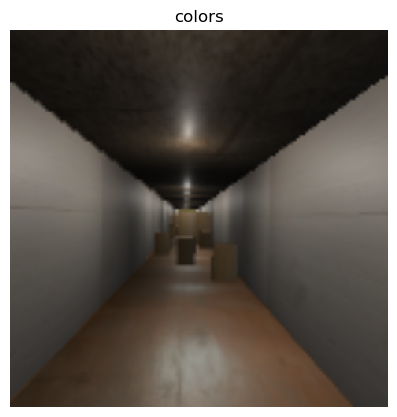

In [3]:
## After connecting, the first thing you should do is 
## resetting the environment 

ENV_TYPE = 0 # 0: plain 1: complex 2: plain_test 3: complex_test

# Reset environment
end, reward, state_raw = environment.reset(ENV_TYPE)
state = environment.state2arrays(state_raw)


## Visualize the environment state 
KIND = 'colors' # Try  'colors', 'objseg', 'semseg',
                #      'normals', 'flow' or 'depth'

# display current state (128x128 image)
img = state[KIND]
img = cv2.resize(img, (480,480))

plt.figure(figsize=(5,5),dpi=100)
plt.imshow(img)
plt.title(KIND)
plt.axis('off')
plt.show()


In [4]:
# For reproducability you can reset the
# random number generator with a specific seed
SEED = 99 # range 0-255
_, _, _= environment.setRandomSeed(SEED)
end, reward, state_raw = environment.reset(1)

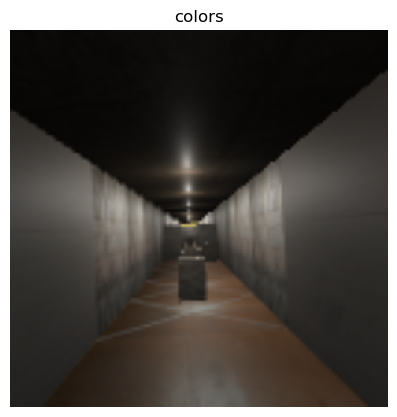

Agent obtained reward: 10 and end signal: 0


In [5]:
### Try walking around with the agent
STEP_TYPE = 0 # 0: forward, 1: left, 2: right

# Reset environment
end, reward, state_raw = environment.step(0)
state = environment.state2arrays(state_raw)

## Visualize
KIND = 'colors'

# display current state (128x128 image)
img = state[KIND]
img = cv2.resize(img, (480,480))

plt.figure(figsize=(5,5),dpi=100)
plt.imshow(img)
plt.title(KIND)
plt.axis('off')
plt.show()

## End signal (0: nothing happened, 1: box collision, 2: wall collision, 3: step target reached)
print('Agent obtained reward: {} and end signal: {}'.format(reward, end))

In [6]:
### Animated stepping

# import matplotlib
# %matplotlib notebook

# f = plt.figure()
# ax = f.gca()

# im = environment.state2usableArray(state_raw)
# image = plt.imshow(im, interpolation='None', animated=True)
# plt.axis('off')

# def animateSteps(frame_index):
#     # Take a step 0:forward 1:left 2:right
#     command = np.random.randint(3)
#     end, reward, state_raw = environment.step(command)
#     reward = -reward + 100 if reward > 100 else reward
#     img = environment.state2arrays(state_raw)[KIND]
    
#     # update frame
#     image.set_data(im)
#     ax.set_title('Reward: {}'.format(reward))
#     return image,

# ani = matplotlib.animation.FuncAnimation(f, animateSteps, interval=500, frames=10, blit=True)

## Phosphene Simulator

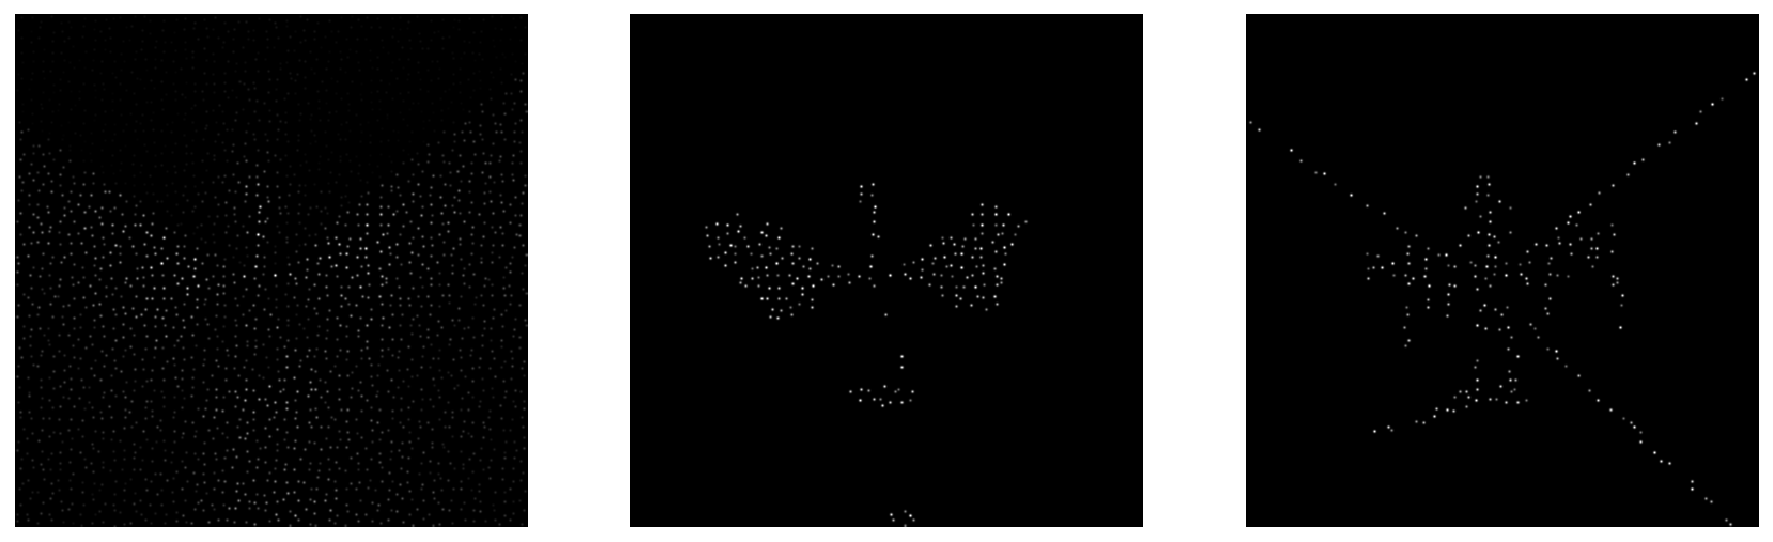

In [7]:
RESOLUTION    = (50,50) # Number of phosphenes
JITTER        = 0.35    # Variation in phosphene location (w.r.t. rectangular grid)
INTENSITY_VAR = 0.9     # Variation in phosphene intensity
SIGMA         = 0.9     # Size parameter for the individual phosphenes 

phosphene_simulator = utils.PhospheneSimulator(phosphene_resolution=RESOLUTION,
                                               jitter=JITTER,
                                               intensity_var=INTENSITY_VAR,
                                               sigma=SIGMA)

# State (128x128 img)
img = environment.state2arrays(state_raw)[KIND]
img = cv2.resize(img, (480,480))

# Activation masks
grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
binarized = (255*(grayscale>100)).astype('uint8')
contours  = cv2.Canny(img, 35,70)

# Visualize
plt.figure(figsize=(15,5),dpi=150)

plt.subplot(1,3,1)
phos = phosphene_simulator(grayscale)
plt.imshow(phos, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
phos = phosphene_simulator(binarized)
plt.imshow(phos, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
phos = phosphene_simulator(contours)
plt.imshow(phos, cmap='gray')
plt.axis('off')


plt.show()